# Global Equities Momentum (GEM) and Global Balanced Momentum (GBM)

In [7]:
import numpy as np
import pandas as pd
import datetime as dt
import src.fmp as fmp
import matplotlib.pyplot as plt

## Define asset allocation

In [8]:
portfolios = {'GEM': ['SPY', 'VEU', 'BND'],
              'GBM': ['SPY', 'VEU', 'BND'],
             'benchmark': ['SPY'],
             'sixtyForty': ['SPY', 'BND'],
             'Permanent': ['VTI', 'BIL', 'TLT', 'GLD']}
momentum = ['GEM', 'GBM']
fixed_portfolio = ['sixtyForty']

## Retrieve historical monthly prices

In [4]:
combined_assets = []

for portfolio in portfolios.keys():
    combined_assets = combined_assets + portfolios[portfolio]

combined_assets = list(set(combined_assets))
combined_assets

['VEU', 'SPY', 'TLT', 'VTI', 'BND', 'GLD', 'BIL']

In [10]:
prices = pd.DataFrame()
for asset in combined_assets:
    prices[asset] = fmp.get_monthly_prices(asset)[asset]

prices    

,VEU,SPY,TLT,VTI,BND,GLD,BIL
2016-09-30,45.430000,216.300003,137.509995,111.330002,84.139999,125.640000,91.459999
2016-10-31,44.660000,212.550003,131.250000,108.889999,83.190002,121.940000,91.480003
2016-11-30,43.709999,220.380005,120.239998,113.779999,80.889999,111.750000,91.440002
2016-12-30,44.180000,223.529999,119.129997,115.320000,80.790001,109.610000,91.400002
2017-01-31,46.009998,227.529999,120.099998,117.459999,80.940002,115.550000,91.440002
2017-02-28,46.590000,236.470001,121.739998,121.800003,81.269997,119.230000,91.459999
2017-03-31,47.830002,235.740005,120.709999,121.320000,81.080002,118.720000,91.419998
2017-04-28,48.830002,238.080002,122.349998,122.610001,81.550003,120.770000,91.459999
2017-05-31,50.320000,241.440002,124.400002,123.849998,81.959999,120.620000,91.440002
2017-06-30,50.029999,241.800003,125.120003,124.449997,81.830002,118.020000,91.480003


## Global Equities Momentum Portfolio

In [34]:
gem_prices = pd.DataFrame()
for col in prices.columns:
    if col in portfolios['GEM']:
        gem_prices[col] = prices[col]

monthly_momentum = gem_prices.copy()
monthly_momentum = monthly_momentum.apply(lambda x: x.shift(1)/x.shift(12) - 1, axis=0)
monthly_momentum.dropna(inplace=True)

rank_df = monthly_momentum.rank(axis=1, ascending=False)
for col in rank_df.columns:
    rank_df[col] = np.where(rank_df[col] == 1, 1, 0)

monthly_gem_returns = gem_prices.pct_change()
monthly_gem_returns.dropna(inplace=True)
monthly_gem_returns = monthly_gem_returns[rank_df.index[0]:].shift(-1)

port = np.multiply(rank_df, monthly_gem_returns)
port_returns = port.sum(axis=1)
port_cum_returns = np.exp(np.log1p(port_returns).cumsum())[:-1]
port_cum_returns

2017-09-29    1.019541
2017-10-31    1.050704
2017-11-30    1.063138
2017-12-29    1.123756
2018-01-31    1.064110
2018-02-28    1.056338
2018-03-29    1.061798
2018-04-30    1.040632
2018-05-31    1.041938
2018-06-29    1.080538
2018-07-31    1.115028
2018-08-31    1.116603
2018-09-28    1.039441
2018-10-31    1.058722
2018-11-30    0.959898
2018-12-31    1.036752
2019-01-31    1.033257
2019-02-28    1.050862
2019-03-29    1.093793
2019-04-30    1.024040
2019-05-31    1.089998
2019-06-28    1.089080
2019-07-31    1.116635
2019-08-30    1.107843
2019-09-30    1.108893
2019-10-31    1.149033
2019-11-29    1.176634
2019-12-31    1.176159
2020-01-31    1.083047
2020-02-28    0.942265
2020-03-31    0.966111
2020-04-30    0.970638
2020-05-29    0.975274
2020-06-30    0.987639
2020-07-31    0.976599
2020-08-31    0.936284
2020-09-30    0.912939
2020-10-30    1.012246
2020-11-30    1.008814
2020-12-31    0.998534
2021-01-29    1.026298
2021-02-26    1.069389
2021-03-31    1.125971
2021-04-30 

## Global Balanced Momentum Portfolio

In [37]:
gbm_prices = pd.DataFrame()
for col in prices.columns:
    if col in portfolios['GBM']:
        gbm_prices[col] = prices[col]

gbm_momentum = gbm_prices.copy()
gbm_momentum = gbm_momentum.apply(lambda x: x.shift(1)/x.shift(12) - 1, axis=0)
gbm_momentum.dropna(inplace=True)

gbm_rank = gbm_momentum.rank(axis=1)
for col in gbm_rank.columns:
    gbm_rank[col] = np.where(gbm_rank[col] > 2, 1, 0)

monthly_gbm_returns = gbm_prices.pct_change()
monthly_gbm_returns.dropna(inplace=True)
monthly_gbm_returns = monthly_gbm_returns[gbm_rank.index[0]:]

gbm_sixty = np.multiply(gbm_rank, monthly_gbm_returns)
gbm_sixty_returns = gbm_sixty.sum(axis=1)

gbm_port = pd.DataFrame()
gbm_port['GBM_sixty'] = gbm_sixty_returns
gbm_port['GBM_forty'] = monthly_gbm_returns['BND']
weight = np.array([0.6, 0.4])
gbm_port['port_return'] = gbm_port.dot(weight)
gbm_cum_returns = (1 + gbm_port['port_return']).cumprod()
gbm_cum_returns

2017-09-29    1.004894
2017-10-31    1.018169
2017-11-30    1.020739
2017-12-29    1.028288
2018-01-31    1.058373
2018-02-28    1.019360
2018-03-29    1.002170
2018-04-30    1.001185
2018-05-31    1.017612
2018-06-29    1.017250
2018-07-31    1.038783
2018-08-31    1.060466
2018-09-28    1.058049
2018-10-31    1.009555
2018-11-30    1.022347
2018-12-31    0.970689
2019-01-31    0.981473
2019-02-28    0.978165
2019-03-29    0.992834
2019-04-30    1.016094
2019-05-31    0.983641
2019-06-28    0.993568
2019-07-31    0.992731
2019-08-30    1.017848
2019-09-30    1.009835
2019-10-31    1.023611
2019-11-29    1.044777
2019-12-31    1.057703
2020-01-31    1.065821
2020-02-28    1.021377
2020-03-31    1.004778
2020-04-30    1.030206
2020-05-29    1.035033
2020-06-30    1.039977
2020-07-31    1.053162
2020-08-31    1.092558
2020-09-30    1.064311
2020-10-30    1.045300
2020-11-30    1.056161
2020-12-31    1.075417
2021-01-29    1.065134
2021-02-26    1.075643
2021-03-31    1.096633
2021-04-30 

## 60/40 Portfolio

In [38]:
sixtyForty = pd.DataFrame()

for col in prices.columns:
    if col in portfolios['sixtyForty']:
        sixtyForty[col] = prices[col]

sixtyForty_returns = sixtyForty.pct_change()
sixtyForty_returns = sixtyForty_returns[rank_df.index[0]:]
sixtyForty_weights = np.array([0.4, 0.6])
sixtyForty_returns['port'] = sixtyForty_returns.dot(sixtyForty_weights)
sixtyForty_cum_returns = np.exp(np.log1p(sixtyForty_returns['port']).cumsum())
sixtyForty_cum_returns

2017-09-29    1.001973
2017-10-31    1.010023
2017-11-30    1.020446
2017-12-29    1.023746
2018-01-31    1.039219
2018-02-28    1.016287
2018-03-29    1.006480
2018-04-30    1.001912
2018-05-31    1.014392
2018-06-29    1.013215
2018-07-31    1.026617
2018-08-31    1.042377
2018-09-28    1.038077
2018-10-31    1.002576
2018-11-30    1.012334
2018-12-31    0.982853
2019-01-31    1.020882
2019-02-28    1.032054
2019-03-29    1.048234
2019-04-30    1.063659
2019-05-31    1.046616
2019-06-28    1.079919
2019-07-31    1.085904
2019-08-30    1.095116
2019-09-30    1.096414
2019-10-31    1.106731
2019-11-29    1.121027
2019-12-31    1.128367
2020-01-31    1.141587
2020-02-28    1.115368
2020-03-31    1.046499
2020-04-30    1.115545
2020-05-29    1.139941
2020-06-30    1.149261
2020-07-31    1.185077
2020-08-31    1.210214
2020-09-30    1.188261
2020-10-30    1.171237
2020-11-30    1.229501
2020-12-31    1.243055
2021-01-29    1.231561
2021-02-26    1.232665
2021-03-31    1.242868
2021-04-30 

## SPY (S&P 500 Index)

In [39]:
benchmark_prices = prices['SPY']
benchmark_returns = benchmark_prices.pct_change()
benchmark_returns = benchmark_returns[rank_df.index[0]:]
benchmark_cum_returns = np.exp(np.log1p(benchmark_returns).cumsum())
benchmark_cum_returns

2017-09-29    1.015112
2017-10-31    1.039032
2017-11-30    1.070791
2017-12-29    1.078266
2018-01-31    1.139036
2018-02-28    1.097620
2018-03-29    1.063275
2018-04-30    1.068770
2018-05-31    1.094751
2018-06-29    1.096125
2018-07-31    1.136733
2018-08-31    1.173017
2018-09-28    1.174674
2018-10-31    1.093499
2018-11-30    1.113782
2018-12-31    1.009819
2019-01-31    1.090670
2019-02-28    1.126025
2019-03-29    1.141379
2019-04-30    1.188008
2019-05-31    1.112247
2019-06-28    1.183886
2019-07-31    1.201786
2019-08-30    1.181664
2019-09-30    1.199119
2019-10-31    1.225625
2019-11-29    1.269991
2019-12-31    1.300497
2020-01-31    1.299972
2020-02-28    1.197058
2020-03-31    1.041456
2020-04-30    1.173704
2020-05-29    1.229625
2020-06-30    1.245949
2020-07-31    1.319326
2020-08-31    1.411411
2020-09-30    1.353146
2020-10-30    1.319407
2020-11-30    1.462928
2020-12-31    1.510687
2021-01-29    1.495293
2021-02-26    1.536870
2021-03-31    1.601398
2021-04-30 

## Portfolio Performance Comparison

In [41]:
combined_df = pd.DataFrame()
combined_df['GEM'] = port_cum_returns
combined_df['GBM'] = gbm_cum_returns
combined_df['Sixty Forty'] = sixtyForty_cum_returns
combined_df['benchmark'] = benchmark_cum_returns
combined_df.iloc[0] = 1
combined_df.index = pd.to_datetime(combined_df.index)

stats_summary = pd.DataFrame(columns = ['Portfolio', 'CAGR (%)', 'MDD (%)', 'CAGR/MDD'])

beginning_month = combined_df.index[0].year

for col in combined_df.columns:
    # compute CAGR
    first_value = combined_df[col][0]
    last_value = combined_df[col][-1]  
    years = len(combined_df[col].index)/12    
    cagr = (last_value/first_value)**(1/years) - 1

    # compute MDD
    cumulative_returns = combined_df[col]
    previous_peaks = cumulative_returns.cummax()
    drawdown = (cumulative_returns - previous_peaks) / previous_peaks
    portfolio_mdd = drawdown.min()
    
    # save CAGR and MDD for each portfolio
    
    stats_summary = stats_summary.append({'Portfolio': col,
                                         'CAGR (%)': cagr * 100,
                                         'MDD (%)': portfolio_mdd * 100,
                                         'CAGR/MDD': abs(cagr / portfolio_mdd).round(2)}, ignore_index=True) 

stats_summary.set_index('Portfolio', inplace=True)
stats_summary.sort_values('CAGR/MDD', ascending=False, inplace=True)
stats_summary

,CAGR (%),MDD (%),CAGR/MDD
Portfolio,,,
Sixty Forty,7.203633,-8.329440,0.86
benchmark,15.724910,-19.918594,0.79
GBM,3.819928,-8.465765,0.45
GEM,5.836263,-22.410941,0.26


## Performance Visualization

Text(0.5, 1.0, 'Portfolio Performance Comparison')

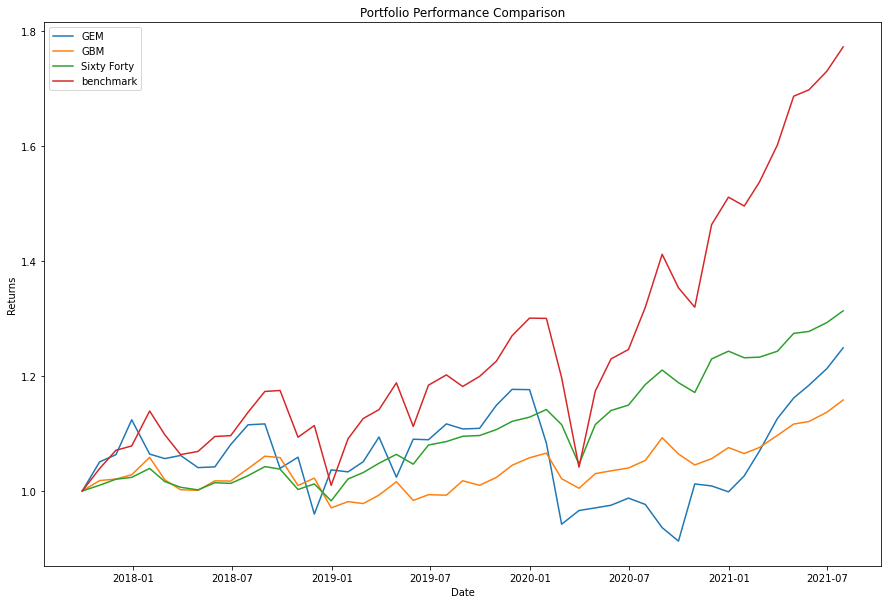

In [42]:
plt.figure(figsize=(15,10))
plt.plot(combined_df)
plt.legend(combined_df.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Portfolio Performance Comparison')